##UNSUPERVISED LEARNING

 - Unsupervised learning uses machine learning algorithms to analyze and cluster unlabeled data sets. These algorithms discover hidden patterns in data without the need for human intervention (hence, they are “unsupervised”).

 - Unsupervised learning models are used for three main tasks: clustering, association and dimensionality reduction:

 - **Clustering** is a data mining technique for grouping unlabeled data based on their similarities or differences. For example, K-means clustering algorithms assign similar data points into groups, where the K value represents the size of the grouping and granularity. This technique is helpful for market segmentation, image compression, etc.
 - **Association** is another type of unsupervised learning method that uses different rules to find relationships between variables in a given dataset. These methods are frequently used for market basket analysis and recommendation engines, along the lines of “Customers Who Bought This Item Also Bought” recommendations.
 - **Dimensionality reduction** is a learning technique used when the number of features  (or dimensions) in a given dataset is too high. It reduces the number of data inputs to a manageable size while also preserving the data integrity. Often, this technique is used in the preprocessing data stage, such as when autoencoders remove noise from visual data to improve picture quality.

###CLUSTERING

 - Clustering is a data mining technique which groups unlabeled data based on their similarities or differences. Clustering algorithms are used to process raw, unclassified data objects into groups represented by structures or patterns in the information. Clustering algorithms can be categorized into a few types, specifically exclusive, overlapping, hierarchical, and probabilistic.

#### EXCLUSIVE AND OVERLAPPING CLUSTERING
Exclusive clustering is a form of grouping that stipulates a data point can exist only in one cluster. This can also be referred to as “hard” clustering. The K-means clustering algorithm is an example of exclusive clustering.

 - **K-means clustering** is a common example of an exclusive clustering method where data points are assigned into K groups, where K represents the number of clusters based on the distance from each group’s centroid. The data points closest to a given centroid will be clustered under the same category. A larger K value will be indicative of smaller groupings with more granularity whereas a smaller K value will have larger groupings and less granularity. K-means clustering is commonly used in market segmentation, document clustering, image segmentation, and image compression.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


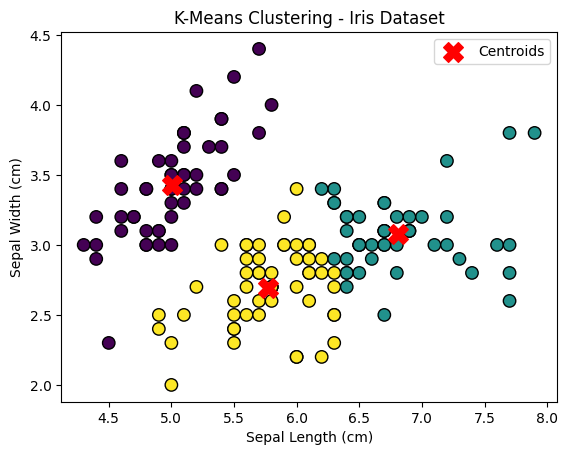

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Only use the first two features for simplicity

# Create a k-means clustering model
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model to the data
kmeans.fit(X)

# Get cluster labels and cluster centers
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolors='k', marker='o', s=80)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Centroids')

plt.title('K-Means Clustering - Iris Dataset')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()

#### HIERARCHICAL CLUSTERING

 - Hierarchical clustering, also known as hierarchical cluster analysis (HCA), is an unsupervised clustering algorithm that can be categorized in two ways: agglomerative or divisive.

  - Agglomerative clustering is considered a “bottoms-up approach.” Its data points are isolated as separate groupings initially, and then they are merged together iteratively on the basis of similarity until one cluster has been achieved. Four different methods are commonly used to measure similarity:

    - Ward’s linkage: This method states that the distance between two clusters is defined by the increase in the sum of squared after the clusters are merged.
    - Average linkage: This method is defined by the mean distance between two points in each cluster.
    - Complete (or maximum) linkage: This method is defined by the maximum distance between two points in each cluster.
    - Single (or minimum) linkage: This method is defined by the minimum distance between two points in each cluster.

 - Euclidean distance is the most common metric used to calculate these distances; however, other metrics, such as Manhattan distance, are also cited in clustering literature.

 - Divisive clustering can be defined as the opposite of agglomerative clustering; instead it takes a “top-down” approach. In this case, a single data cluster is divided based on the differences between data points.

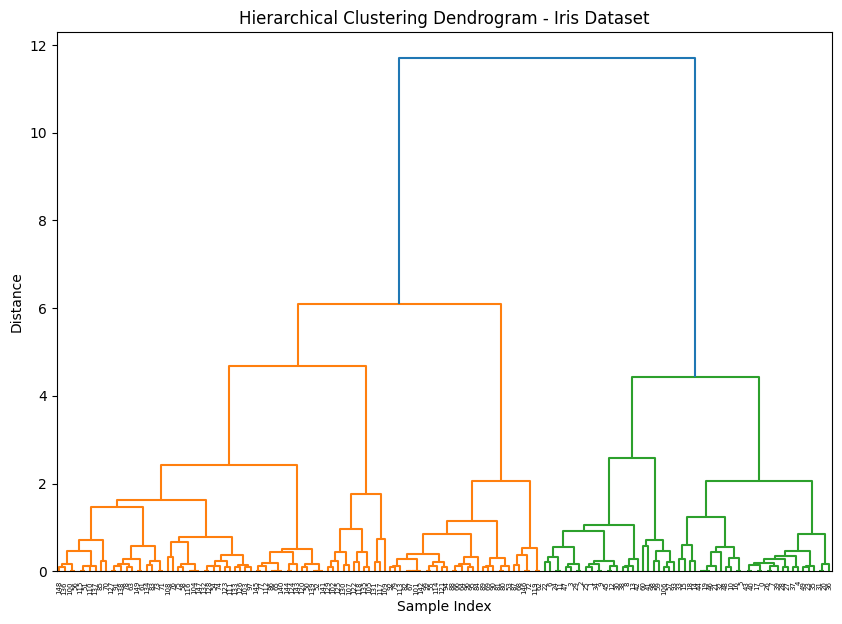

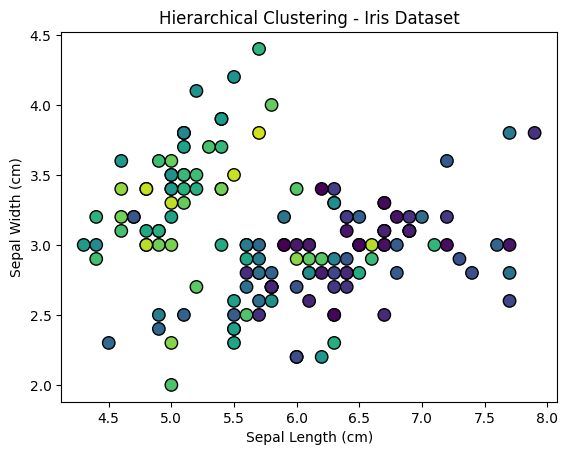

In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Only use the first two features for simplicity

# Create a hierarchical clustering model
agg_clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=0, linkage='ward')

# Fit the model to the data
agg_labels = agg_clustering.fit_predict(X)

# Visualize the dendrogram
linked = linkage(X, 'ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram - Iris Dataset')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=agg_labels, cmap='viridis', edgecolors='k', marker='o', s=80)
plt.title('Hierarchical Clustering - Iris Dataset')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()

####PROBABILISTIC CLUSTERING

 - A probabilistic model is an unsupervised technique that helps us solve density estimation or “soft” clustering problems. In probabilistic clustering, data points are clustered based on the likelihood that they belong to a particular distribution. The Gaussian Mixture Model (GMM) is the one of the most commonly used probabilistic clustering methods.

 - **Gaussian Mixture Models** are classified as mixture models, which means that they are made up of an unspecified number of probability distribution functions. GMMs are primarily leveraged to determine which Gaussian, or normal, probability distribution a given data point belongs to. If the mean or variance are known, then we can determine which distribution a given data point belongs to. However, in GMMs, these variables are not known, so we assume that a latent, or hidden, variable exists to cluster data points appropriately. While it is not required to use the Expectation-Maximization (EM) algorithm, it is a commonly used to estimate the assignment probabilities for a given data point to a particular data cluster.   

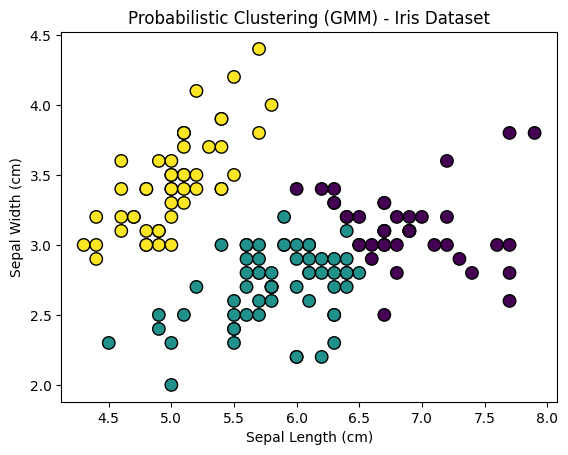

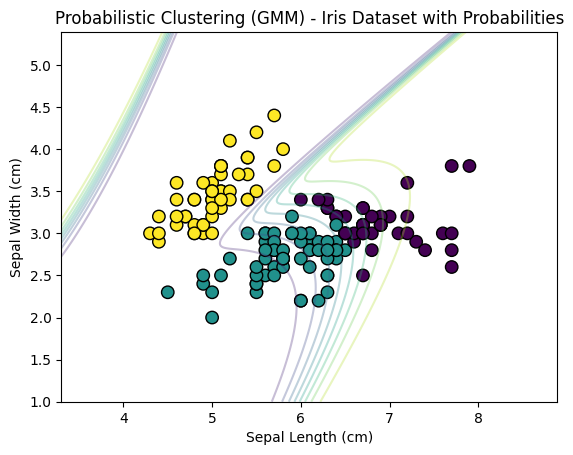

In [3]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.mixture import GaussianMixture

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Only use the first two features for simplicity

# Create a Gaussian Mixture Model (GMM) for probabilistic clustering
gmm = GaussianMixture(n_components=3, random_state=42)

# Fit the model to the data
gmm.fit(X)

# Predict cluster assignments and probabilities
labels = gmm.predict(X)
probabilities = gmm.predict_proba(X)

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolors='k', marker='o', s=80)
plt.title('Probabilistic Clustering (GMM) - Iris Dataset')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()

# Contour Plot (Probabilities): The contour function is used to create contour lines that represent regions of equal probability.
# In the context of probabilistic clustering, this means regions where the probability of belonging to a specific cluster is constant.
# The contours are plotted on top of the scatter plot.

# Visualize the probabilities as contours
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolors='k', marker='o', s=80)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = gmm.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 0].reshape(xx.shape)  # Use the probability of the first cluster for contour
plt.contour(xx, yy, Z, cmap='viridis', levels=np.linspace(0, 1, 10), alpha=0.3)
plt.title('Probabilistic Clustering (GMM) - Iris Dataset with Probabilities')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()


### ASSOCIATION

 - An association rule is a rule-based method for finding relationships between variables in a given dataset. These methods are frequently used for market basket analysis, allowing companies to better understand relationships between different products. Understanding consumption habits of customers enables businesses to develop better cross-selling strategies and recommendation engines. Examples of this can be seen in Amazon’s “Customers Who Bought This Item Also Bought” or Spotify’s "Discover Weekly" playlist. While there are a few different algorithms used to generate association rules, such as Apriori, Eclat, and FP-Growth, the Apriori algorithm is most widely used.

 - Apriori algorithms
  - Apriori algorithms have been popularized through market basket analyses, leading to different recommendation engines for music platforms and online retailers. They are used within transactional datasets to identify frequent itemsets, or collections of items, to identify the likelihood of consuming a product given the consumption of another product. For example, if I play Black Sabbath’s radio on Spotify, starting with their song “Orchid”, one of the other songs on this channel will likely be a Led Zeppelin song, such as “Over the Hills and Far Away.” This is based on my prior listening habits as well as the ones of others. Apriori algorithms use a hash tree to count itemsets, navigating through the dataset in a breadth-first manner.

###DIMENSIONALITY REDUCTION
 - While more data generally yields more accurate results, it can also impact the performance of machine learning algorithms (e.g. overfitting) and it can also make it difficult to visualize datasets. Dimensionality reduction is a technique used when the number of features, or dimensions, in a given dataset is too high. It reduces the number of data inputs to a manageable size while also preserving the integrity of the dataset as much as possible. It is commonly used in the preprocessing data stage, and there are a few different dimensionality reduction methods that can be used.

#####PRINCIPLE COMPONENT ANALYSIS

 - **Principal component analysis (PCA)** is a type of dimensionality reduction algorithm which is used to reduce redundancies and to compress datasets through feature extraction. This method uses a linear transformation to create a new data representation, yielding a set of "principal components."
  - The first principal component is the direction which maximizes the variance of the dataset.
  - While the second principal component also finds the maximum variance in the data, it is completely uncorrelated to the first principal component, yielding a direction that is perpendicular, or orthogonal, to the first component.
  
  This process repeats based on the number of dimensions, where a next principal component is the direction orthogonal to the prior components with the most variance.

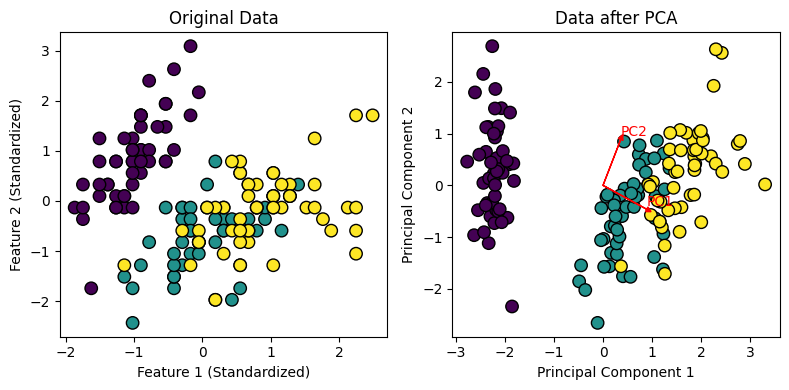

In [4]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler#values from 0 to 1

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Standardize the features
X_standardized = StandardScaler().fit_transform(X)#training data-> make the values from 0 to 1

# Apply PCA to reduce to 2 principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)#PCA transforms the data using fit_transform fucntion

# Plot the original data
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.scatter(X_standardized[:, 0], X_standardized[:, 1], c=y, cmap='viridis', edgecolors='k', marker='o', s=80)
plt.title('Original Data')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')

# Plot the principal components
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolors='k', marker='o', s=80)
plt.title('Data after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Plot the principal components as vectors
for i, (variance, vector) in enumerate(zip(pca.explained_variance_, pca.components_)):
    scale = np.sqrt(variance)
    plt.arrow(0, 0, vector[0] * scale, vector[1] * scale, head_width=0.1, head_length=0.1, fc='r', ec='r')
    plt.text(vector[0] * scale, vector[1] * scale, f'PC{i+1}', color='r', ha='left', va='bottom')

plt.tight_layout()
plt.show()


#####AUTOENCODERS

**Autoencoders** leverage neural networks to compress data and then recreate a new representation of the original data’s input. The hidden layer specifically acts as a bottleneck to compress the input layer prior to reconstructing within the output layer. The stage from the input layer to the hidden layer is referred to as “encoding” while the stage from the hidden layer to the output layer is known as “decoding.”

In [ ]:
#Data-> Encodes(Compresses) -> Compressed(data loss may occur) ->reconstruct(fix the missing data due to compression)